$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

In [1]:
import os
import subprocess
from itertools import product
## IMPORTANT: Make sure that "Uniandes_Framework" is in .gitignore
framework_path = "Uniandes_Framework"

if os.path.exists(framework_path):
    # Pull updates if the framework is already cloned
    try:
        subprocess.run(["git", "-C", framework_path, "pull"])
    except subprocess.CalledProcessError as e:
        raise Exception(f"Error occurred while pulling updates from the framework: {e}")
else:
    # Clone the framework if it is not already cloned
    try:
        subprocess.run(["git", "clone", "git@github.com:Phenomenology-group-uniandes/Uniandes_Framework.git"])
    except subprocess.CalledProcessError as e:
        raise Exception(f"Error occurred while cloning the framework: {e}")

hint: Pulling without specifying how to reconcile divergent branches is
hint: discouraged. You can squelch this message by running one of the following
hint: commands sometime before your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.


Already up to date.


In [2]:
from Uniandes_Framework.delphes_reader import DelphesLoader 
from Uniandes_Framework.delphes_reader import classifier 
from Uniandes_Framework.delphes_reader import root_analysis 
from Uniandes_Framework.delphes_reader import Quiet 

from ROOT import TH1F 
from ROOT import TCanvas 
from ROOT import THStack 
from ROOT import TLegend 
from ROOT import TLatex 

import pandas as pd
import numpy as np

Welcome to JupyROOT 6.22/06


In [3]:
cases = ["woRHC",
         # "wRHC"
        ]

limits = ['zp_upper_limit',
          #'zp_lower_limit'
         ]

signals = ["non-res_tau_tau",
           "zp_tau_tau"
          ]

M_U= [1000]
G_U = [1.75]
G_ZP = [1.5]

In [4]:
channels = ['hadronic_non-resonant','hadronic_sLQ','hadronic_dLQ','semileptonic_non-resonant','semileptonic_sLQ','semileptonic_dLQ']

In [5]:
Datasets_signal = {} 

for case, limit in product(cases, limits):
    key = f'{case}_{limit}'
    Datasets_signal[key] = {}
    
    for channel in channels:
        Datasets_signal[key][channel] = {}
        
        for m , gu, gzp in product(M_U,G_U, G_ZP):
            Datasets_signal[key][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')] = {}
            
            for signal in signals:
                signal_csv_name = f"{key}_" + signal + f"_mu_{m}_gu{gu}_gzp_{gzp}".replace('.', '_') + f'_{channel}.csv'
                path_csv = os.path.join(os.sep, 'disco4', 'pheno_csv_files', 'lq_zprime', signal, case, limit, f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_'), signal_csv_name)

                Datasets_signal[key][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')][signal] = pd.read_csv(path_csv)

# bkgs = ['ttbar', 'stop','z_jets', 'w_jets', 'ww', 'wz', 'zz']    
# Datasets_bkg = {} 

# for channel in channels:
#     Datasets_bkg[channel] = {}
#     for bkg in bkgs:
#         Datasets_bkg[channel][bkg] = {}
#         path_csv = os.path.join(os.sep, 'disco4', 'pheno_csv_files', 'Leptoquarks_Searches', f'{bkg}', f'{bkg}_{channel}.csv')
#         try: Datasets_bkg[channel][bkg] = pd.read_csv(path_csv)
#         except: print(f'{path_csv} is empty or the path is wrong.')

In [6]:
# Datasets_bkg['hadronic_sLQ']['ttbar'].head()

In [7]:
# Datasets_signal['woRHC_zp_upper_limit']['hadronic_non-resonant']['mu_1000_gu1_75_gzp_1_25'].keys()

In [8]:
# Datasets_signal['woRHC_zp_upper_limit']['hadronic_non-resonant']['mu_1000_gu1_75_gzp_1_25']['non-res_tau_tau']

In [9]:
bins_dict={
    "#Delta{R}":[96,0,7],
    "#Delta{#eta}":[80,-5,5],
    "#Delta{#phi}":[52,-3.25,3.25],
    "#Delta{pT}":[120, 0.0, 1500.0],
    "#Delta{#vec{pT}}":[240, 0.0, 4800.0],
    "#Delta{#vec{p}}":[240, 0.0, 4800.0],
    "MET(GeV)":[80, 0.0, 1000.0],
    "pT_": [160, 0.0, 2000.0],
    "sT(GeV)": [200, 0.0, 4000.0],
    "mT(GeV)": [200, 0.0, 4000.0],
    "#eta_":[80, -5, 5],
    "#phi_":[128, -3.2, 3.2],
    "Energy_":[80, 0.0, 1000.0],
    "m_ll(GeV)" : [160, 0.0, 2000.0],
    "light_jets_multiplicity": [2, 0, 1],
    "Mass_{#tau_{1}#tau_{2}}(GeV)": [160, 0.0, 2000.0],
    "Mass_{lep_{1}#tau_{1}}(GeV)": [160, 0.0, 2000.0]
}

In [10]:
Histograms_signal = {} 

for case, limit in product(cases, limits):
    key = f'{case}_{limit}'
    Histograms_signal[key] = {}
    
    for channel in channels:
        Histograms_signal[key][channel] = {}
        
        for m , gu, gzp in product(M_U,G_U, G_ZP):
            Histograms_signal[key][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')] = {}
            
            for signal in signals:
                
                Data = Datasets_signal[key][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')][signal]
                Histograms_signal[key][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')][signal] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)   
    
# Histograms_bkg = {} 

# for channel in channels:
#     Histograms_bkg[channel] = {}
#     for bkg in bkgs:                
#         Data = Datasets_bkg[channel][bkg]
#         Histograms_bkg[channel][bkg] = root_analysis.make_histograms(Data, hist_bins_dict = bins_dict)

In [11]:
#Histograms_bkg['hadronic_sLQ']['ttbar']

In [12]:
Histograms_signal['woRHC_zp_upper_limit']['hadronic_non-resonant']

{'mu_1000_gu1_75_gzp_1_5': {'non-res_tau_tau': {'pT_{#tau_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x560cf3b53b30>,
   '#eta_{#tau_{1}}': <cppyy.gbl.TH1F object at 0x560cf2bce2e0>,
   '#phi_{#tau_{1}}': <cppyy.gbl.TH1F object at 0x560cf3b56320>,
   'Energy_{#tau_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x560cf3c58d90>,
   '#Delta{R}_{#tau_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x560cf3b724e0>,
   '#Delta{#eta}_{#tau_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x560cf3b3f3c0>,
   '#Delta{#phi}_{#tau_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x560cf187d2a0>,
   '#Delta{pT}_{#tau_{1}#tau_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x560cf4218ad0>,
   '#Delta{#vec{pT}}_{#tau_{1}#tau_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x560cf3b49d00>,
   '#Delta{#vec{p}}_{#tau_{1}#tau_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x560cf3b56ba0>,
   '#Delta{R}_{#tau_{1}MET}': <cppyy.gbl.TH1F object at 0x560cf3b47fa0>,
   '#Delta{#eta}_{#tau_{1}MET}': <cppyy.gbl.TH1F object at 0x560cf3b6a1d0>,
   '#Delta{#phi}_{#tau_{1}MET}': 

In [13]:
!rm -rf Most_Important_Kinematic_Histograms/

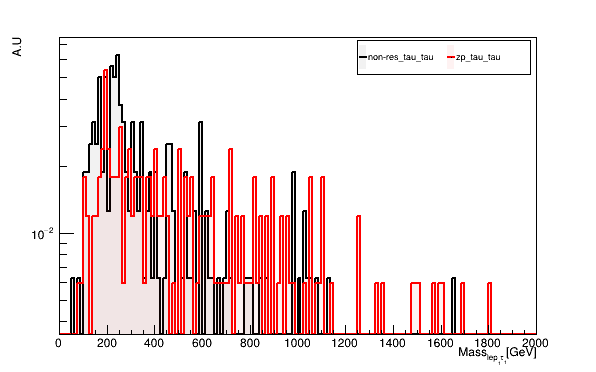

In [14]:
def escape_braces(strings):
    escaped_strings = []
    for s in strings:
        #escaped_s = s.replace('#tau', 'tau_jet').replace('b', 'b_jet').replace('#Delta R', '#Delta{R}').replace('#Delta ', '#Delta').replace('#Delta#eta', '#Delta{#eta}').replace('#Delta#phi', '#Delta{#phi}')
        escaped_s = s.replace('#Delta R', '#Delta{R}').replace('#Delta ', '#Delta').replace('#DeltapT', '#Delta{pT}').replace('#Delta#eta', '#Delta{#eta}').replace('#Delta#phi', '#Delta{#phi}')
        escaped_strings.append("{}".format(escaped_s))
    return escaped_strings


folder = 'Most_Important_Kinematic_Histograms'
os.makedirs(folder, exist_ok=True)

for case, limit, channel, m , gu, gzp in product(cases, limits, channels, M_U,G_U, G_ZP):
    
    m_gu_gz = f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')
    os.makedirs(os.path.join(folder, case, limit, channel , m_gu_gz), exist_ok=True)

    important_features = []
    with open(os.path.join(os.path.dirname(os.getcwd()), '04_ML_Classification','XGB_models', channel, f'Most_Important_Features.txt'), "r") as f:
        for line in f: important_features.append(line.strip())
    f.close()    
    
    Important_features = escape_braces(important_features) + ['light_jets_multiplicity']
    
    if 'hadronic' in channel: Important_features = Important_features + ["Mass_{#tau_{1}#tau_{2}}(GeV)"]
    else: Important_features = Important_features + ["Mass_{lep_{1}#tau_{1}}(GeV)"]
    
    for feature in Important_features:
        if 'Q_' in feature: continue
        
        histos, canvas, legend = root_analysis.overlap_histos(feature, Histograms_signal[f'{case}_{limit}'][channel][m_gu_gz], log_scale =True)
        with Quiet(): canvas.SaveAs(os.path.join(folder, case, limit, channel , m_gu_gz, f"{feature}.pdf".replace('{', '').replace('}', '')))

In [15]:
# def Read_Cutflows_N_Events(channel, signal, Luminosity = 137*1000):
    
#     #[Luminosity]: 1/pb
#     cutflows_path = os.path.join('Cutflows', f'{channel}.csv')
#     cutflows_file = pd.read_csv(cutflows_path, index_col= 0)
#     cutflows_file = cutflows_file.dropna()
    
#     Efficience = cutflows_file[signal]['DeltaR > 0.3']/cutflows_file[signal]['All']
#     XS = cutflows_file[signal]['XS']
#     return Efficience*XS*Luminosity

In [16]:
# for case, limit, channel, m , gu, gzp, signal in product(cases, limits, channels, M_U,G_U, G_ZP, signals):
#     for histo_key in Histograms_signal[f'{case}_{limit}'][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')][signal]:
#         histo = Histograms_signal[f'{case}_{limit}'][channel][f'mu_{m}_gu{gu}_gzp_{gzp}'.replace('.', '_')][signal][histo_key]
        
#         signal_key = f"{case}_{limit}_{signal}_mu_{m}_gu{gu}_gzp_{gzp}".replace('.', '_')
        
#         N_events = Read_Cutflows_N_Events(channel, signal_key)
#         try: histo.Scale(N_events/histo.Integral())
#         except: pass

In [17]:
# for channel in channels:
#     for bkg in bkgs: 
#         N_events = Read_Cutflows_N_Events(channel, bkg)
        
#         for histo_key in Histograms_bkg[channel][bkg]:

#             histo = Histograms_bkg[channel][bkg][histo_key]
#             try: histo.Scale(N_events/histo.Integral())
#             except: pass

# for channel in channels:
#     Histograms_bkg[channel]['w_jets'] = {}
#     N_events = Read_Cutflows_N_Events(channel, 'w_jets')
    
#     for histo_key in Histograms_bkg[channel]['z_jets']:
                
#         h_w_jets = Histograms_bkg[channel]['z_jets'][histo_key].Clone('')
#         h_w_jets.SetDirectory(0)
#         h_w_jets.SetNameTitle('w_jets', 'w_jets')
#         try: h_w_jets.Scale(N_events/h_w_jets.Integral())
#         except: pass
    
#         Histograms_bkg[channel]['w_jets'][histo_key] = h_w_jets

In [18]:
# suffix_by_betard = {'wRHC': '', 'woRHC': '_wo_RHC'}
# header_by_betard = {'wRHC': '#beta_{R} = -1', 'woRHC': '#beta_{R} = 0'}

# def Overlap_Histos(Signal_Histogram_Dict, 
#                    Bkg_Histogram_Dict, 
#                    channel,
#                    Signal_Directory, 
#                    Bkg_Directory, 
#                    Title_Plot,
#                    Kinematic_variable,
#                    Mass, 
#                    betard_key = 'wRHC',
#                    Signal_to_ignore = '', 
#                    alpha_bkg = 0.05, 
#                    alpha_signal = 0.05, 
#                    Stack = False, 
#                    Log_Y = False, 
#                    Log_X = True, 
#                    Grid = False,
#                    Path_folder_to_save = ''):
    
#     #if Stack is False -> Histograms will be normalized by A.U
#     #if Stack is True -> Histograms will be normalized by number of physical events
    
#     #canvas = TCanvas(Title_Plot, " ", 0, 0, 1280, 720)
#     canvas = TCanvas(Title_Plot, " ", 0, 0, 800, 600)
    
    
#     #legend = TLegend(0.9,.4,1,.89) #Legend outside the graph
#     legend = TLegend(0.48,.75,0.87,.89)
#     legend.SetNColumns(4) 
#     legend.SetHeader('Mass_{U}' + f'= {int(Mass)/1000} TeV' + ', g_{U} = 1.8' + ', ' + header_by_betard[betard_key],"C")
#     legend.SetLineWidth(1)
#     #legend.SetFillStyle(0) #Transparent legend window
    
#     x_axis = Kinematic_variable.replace('(GeV)', '[GeV]')
    
#     Histos = THStack('hist', Title_Plot)
#     colors = [94,6,3,209,1,2,226,4] #https://root-forum.cern.ch/t/what-is-your-best-way-to-increment-colors/13809
    
#     Dict_Hist = {}
        
#     for i in range(len(Bkg_Directory.keys())):
#             bkg_key = list(Bkg_Directory.keys())[i]
#             bkg_list = Bkg_Directory[bkg_key]
            
#             histo_list = []
#             for bkg in bkg_list:
#                 if (bkg != Signal_to_ignore):
#                     if (Bkg_Histogram_Dict[channel][bkg][Kinematic_variable] != {}):
#                         h = Bkg_Histogram_Dict[channel][bkg][Kinematic_variable]
#                         h.Scale(Read_Cutflows_N_Events(channel, bkg)/h.Integral())
#                         histo_list.append(h)
                
#             histo_Nevents = root_analysis.sum_histos(histo_list)
#             histo_normalized = root_analysis.sum_histos(histo_list)
#             histo_normalized.Scale(1.0/histo_normalized.Integral())
            
#             if (Stack): 
#                 histo = histo_Nevents
#                 histo.SetTitle(f'{bkg_key}; {x_axis}; Events')
#             else: 
#                 histo = histo_normalized
#                 histo.SetTitle(f'{bkg_key}; {x_axis}; A.U')
            
#             color = len(Signal_Directory.keys()) + i + 1
#             if color == 7: color = 3
            
#             color = colors[i]
            
#             histo.SetLineColor(color)
#             histo.SetFillColorAlpha(color, alpha_bkg)
#             histo.SetLineWidth(2)
#             histo.SetDirectory(0)  
#             histo.Rebin(2)
            
#             Histos.Add(histo)
#             Dict_Hist[bkg_key] = histo
#             legend.AddEntry(histo,bkg_key)
    
#     Signal_Histogram_Dict = Signal_Histogram_Dict[betard_key]
#     for j in range(len(Signal_Directory.keys())):
#             signal_key = list(Signal_Directory.keys())[j]
#             signal_list = Signal_Directory[signal_key]
            
#             histo_list = []
#             for signal in signal_list:
#                 if (signal != Signal_to_ignore):
#                     if (Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable] != {}):
#                         h = Signal_Histogram_Dict[channel][Mass][signal][Kinematic_variable]
#                         h.Scale(Read_Cutflows_N_Events(channel, f'{signal}{suffix_by_betard[betard_key]}_{Mass}')/h.Integral())
#                         histo_list.append(h)
                
#             histo_Nevents = root_analysis.sum_histos(histo_list)
            
#             histo_normalized = root_analysis.sum_histos(histo_list)
#             histo_normalized.Scale(1.0/histo_normalized.Integral())
            
#             if (Stack): 
#                 histo = histo_Nevents
#                 histo.SetTitle(f'{signal_key}; {x_axis}; Events')
#             else: 
#                 histo = histo_normalized
#                 histo.SetTitle(f'{signal_key}; {x_axis}; A.U')
            
#             color = j + 1
#             if color == 3: color = 7
            
#             color = colors[i + j + 1]
            
#             histo.SetLineColor(color)
#             histo.SetFillColorAlpha(color, alpha_signal)
#             histo.SetLineStyle(2)
#             histo.SetLineWidth(2)
#             histo.SetDirectory(0) 
#             histo.Rebin(2)
            
#             Histos.Add(histo)
#             Dict_Hist[signal_key] = histo
#             legend.AddEntry(histo,signal_key)
            
#     if Log_Y: canvas.SetLogy()
#     if Log_X: canvas.SetLogx()
#     if Grid: canvas.SetGrid()
        
#     if Stack:
#         Histos.Draw("hist")
#         Histos.SetTitle(f'{Title_Plot}; {x_axis}; Events')  
        
#     else: 
#         Histos.Draw("histnostack")
#         Histos.SetTitle(f'{Title_Plot}; {x_axis}; A.U')  
    
#     latex = TLatex()
#     latex.SetNDC()
#     latex.SetTextSize(0.04)
#     latex.DrawLatex(0.76,0.91,'#sqrt{s} = 13 TeV')
#     #latex.DrawLatex(0.61,0.91,'#sqrt{s} = 13 TeV, L = 137 fb^{-1}')

#     canvas.Draw()
#     legend.Draw('same')
    
#     #Histos.GetXaxis().SetLimits(0.0, float(Mass)*3)          
    
#     if Path_folder_to_save != '':
#         try: os.mkdir(Path_folder_to_save)
#         except: pass

#         with root_analysis.Quiet():
#             root_analysis.Save_Histograms_png(Path_folder_to_save, Dict_Hist, Log_Y = True)
#             root_analysis.Write_txt_file_with_high_per_bin(os.path.join(Path_folder_to_save, 'high_per_bin'), Dict_Hist)
#             canvas.SaveAs(os.path.join(Path_folder_to_save, f'THStack_{channel}.png')) 
            
#     Dict_Hist['THStack'] = Histos     
    
#     return Histos, canvas, legend, Dict_Hist

In [19]:
# Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
#                                                    Bkg_Histogram_Dict = Histograms_bkg, 
#                                                    channel = "hadronic_dLQ",
#                                                    Signal_Directory = {'Lq Lq': ['LQ_LQ'], '#tau Lq': ['Tau_LQ'], '#tau #tau': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
#                                                    Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
#                                                    Title_Plot = '',
#                                                    Kinematic_variable = 'sT(GeV)',
#                                                    Mass = '1750', 
#                                                    betard_key = 'woRHC',
#                                                    Signal_to_ignore = '', 
#                                                    alpha_bkg = 0.0, 
#                                                    alpha_signal = 0.00, 
#                                                    Stack = False, 
#                                                    Log_Y = True, 
#                                                    Log_X = False, 
#                                                    Grid = False,
#                                                    Path_folder_to_save = '')

In [20]:
# try: os.mkdir('ST_Histograms')
# except: pass

# for process in channels:
    
#     if (process == 'hadronic_non-resonant'): titulo = '#tau_{h} #tau_{h}'
#     if (process == 'hadronic_sLQ'): titulo = 'b #tau_{h} #tau_{h}'
#     if (process == 'hadronic_dLQ'): titulo = 'b b #tau_{h} #tau_{h}'
#     if (process == 'semileptonic_non-resonant'): titulo = '#tau_{h} #tau_{lep}'
#     if (process == 'semileptonic_sLQ'): titulo = 'b #tau_{h} #tau_{lep}'
#     if (process == 'semileptonic_dLQ'): titulo = 'b b #tau_{h} #tau_{lep}'   
                    
#     Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
#                                                    Bkg_Histogram_Dict = Histograms_bkg, 
#                                                    channel = process,
#                                                    Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
#                                                    Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
#                                                    Title_Plot = titulo,
#                                                    Kinematic_variable = 'sT(GeV)',
#                                                    Mass = '1500', 
#                                                    betard_key = 'wRHC',
#                                                    Signal_to_ignore = '', 
#                                                    alpha_bkg = 0.0, 
#                                                    alpha_signal = 0.00, 
#                                                    Stack = False, 
#                                                    Log_Y = True, 
#                                                    Log_X = False, 
#                                                    Grid = False,
#                                                    Path_folder_to_save = '')
    
#     canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_wRHC.pdf')) 
    
#     Histos, canvas, legend, Dict_Hist = Overlap_Histos(Signal_Histogram_Dict = Histograms_signal, 
#                                                    Bkg_Histogram_Dict = Histograms_bkg, 
#                                                    channel = process,
#                                                    Signal_Directory = {'dLQ': ['LQ_LQ'], 'sLQ': ['Tau_LQ'], 'non-res': ['Tau_Tau'], 'Combined':  ['LQ_LQ', 'Tau_LQ', 'Tau_Tau']}, 
#                                                    Bkg_Directory = {'t#bar{t}': ['ttbar'], 'stop': ['stop'], 'Diboson': ['ww', 'wz', 'zz'], 'V+jets': ['w_jets', 'z_jets']}, 
#                                                    Title_Plot = titulo,
#                                                    Kinematic_variable = 'sT(GeV)',
#                                                    Mass = '1500', 
#                                                    betard_key = 'woRHC',
#                                                    Signal_to_ignore = '', 
#                                                    alpha_bkg = 0.0, 
#                                                    alpha_signal = 0.00, 
#                                                    Stack = False, 
#                                                    Log_Y = True, 
#                                                    Log_X = False, 
#                                                    Grid = False,
#                                                    Path_folder_to_save = '')
    
#     canvas.SaveAs(os.path.join('ST_Histograms', f'sT(GeV)_{process}_woRHC.pdf')) 